# Quest 2
*Also known as "The Big Homework #2".*

---
In this homework you will work with one of the two given categorized corpora:<br>
* Latvian students - take the corpus in Latvian - __*satori*__ (a small corpus of articles published in <a href="https://satori.lv/" target="_blank">Satori</a>).<br>
* Foreign students - take the corpus in English - __*brown-small*__ (a small version of the <a href="https://en.wikipedia.org/wiki/Brown_Corpus" target="_blank">Brown corpus</a>).

---
# Part 1: Corpus, n-grams, collocations, frequencies

---
### Task 1

Use appropriate corpus reader to read the given corpus.

In [1]:
from nltk.corpus import CategorizedPlaintextCorpusReader
brownsmall = CategorizedPlaintextCorpusReader('data/brown-small', '.*txt', cat_file = 'cats.list')# There's a README file in the directory, so I use ".*txt" to print corpus.
print(len(brownsmall.fileids())) #exclude "cat.list" and "README" files it should contain 108 corpora. 

108


Print the list of categories in the corpus.

In [2]:
brownsmall.categories()

['government', 'news', 'religion', 'reviews']

Compute and print overall average document length (in words) in the corpus as well as average document length for each separate category.

In [3]:
#Computing overall average document length
overall_words = brownsmall.words()
print('Overall average document length in the whole corpus:' , round(len(overall_words)/len(brownsmall.fileids())))

#Get the list of words in each category
governs = brownsmall.words(categories=['government'])
news = brownsmall.words(categories=['news'])
religions = brownsmall.words(categories=['religion'])
reviews = brownsmall.words(categories=['reviews'])

#Get the number of files in each category
num_of_governs = len((brownsmall.fileids(['government'])))
num_of_news = len((brownsmall.fileids(['news'])))
num_of_religions = len((brownsmall.fileids(['religion'])))
num_of_reviews = len((brownsmall.fileids(['reviews'])))

#computing average document length in each category
print('Average document length for "government" category:' , round(len(governs)/num_of_governs))
print('Average document length for "news" category:' , round(len(news)/num_of_news))
print('Average document length for "religions" category:' , round(len(religions)/num_of_religions))
print('Average document length for "reviews" category:' , round(len(reviews)/num_of_reviews))

Overall average document length in the whole corpus: 2408
Average document length for "government" category: 2408
Average document length for "news" category: 2411
Average document length for "religions" category: 2335
Average document length for "reviews" category: 2472


---
### Task 2
Create trigrams from the whole corpus but keep only those trigrams where the words contain only alphabetic characters and are not stopwords. Print the number of trigrams you got and print a table of top 10 most frequent trigrams together with their frequencies.

*Remember that stop-word removal should be done using means appropriate for the language of the corpus.*

In [4]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

words = [word.lower() for word in overall_words if word not in stopwords and word[0].isalpha()]

trigrams = list(nltk.ngrams(words, 3))
print('Number of trigrams:' , len(trigrams))

print()

trigram_freq = nltk.FreqDist(trigrams)
for trigram, freq in trigram_freq.most_common(10):
    print(' '.join(trigram) + '\n' + str(freq))

Number of trigrams: 129082

united states america
26
government united states
25
washington d c
18
new york central
15
john a notte
15
a notte jr
15
notte jr governor
15
anti trust laws
14
per capita income
14
export import bank
14


Now do the same with bigrams.

In [5]:
bigrams = list(nltk.ngrams(words, 2))
print('Number of bigrams:' , len(bigrams))

print()

bigram_freq = nltk.FreqDist(bigrams)
for bigram, freq in bigram_freq.most_common(10):
    print(' '.join(bigram) + '\n' + str(freq))

Number of bigrams: 129083

united states
191
u s
146
new york
123
rhode island
85
per cent
64
fiscal year
56
last year
47
peace corps
46
du pont
46
mr mrs
42


Now do the same with single words, i.e., unigrams.

In [6]:
unigrams = list(nltk.ngrams(words, 1))
print('Number of unigrams:' , len(unigrams))

print()

unigram_freq = nltk.FreqDist(unigrams)
for unigram, freq in unigram_freq.most_common(10):
    print(' '.join(unigram) + '\n' + str(freq))

Number of unigrams: 129084

the
1791
one
617
new
582
i
536
would
483
said
463
year
450
state
431
a
418
may
398


---
### Task 3
Extract and print top 10 trigram collocations for each category of the corpus. (Create a loop for going through the categories. Do not just copy your code as many times as there are categories.)

In [7]:
from nltk.collocations import *
def coll(words, n, num):
    if n == 3:
        collocation_finder = TrigramCollocationFinder.from_words(words)
        ngram_measures = nltk.collocations.TrigramAssocMeasures()
    elif n == 2:
        collocation_finder = BigramCollocationFinder.from_words(words)
        ngram_measures = nltk.collocations.BigramAssocMeasures()
    else:
        return []
    def filter(none_alpha):
        return not none_alpha.isalpha() 
    collocation_finder.apply_word_filter(filter)
    return collocation_finder.nbest(ngram_measures.pmi, num)



for word in brownsmall.categories():
    if word == 'government':
        print(coll(governs, 3, 10))
    elif word == 'news':
        print(coll(news, 3, 10))
    elif word == 'religion':
        print(coll(religions, 3, 10))
    elif word == 'reviews':
        print(coll(reviews, 3, 10))
    else:
        pass

[('Canadian', 'Liaison', 'Officers'), ('Federico', 'Garcia', 'Lorca'), ('Gray', 'Iron', 'Foundry'), ('Mig', 'jet', 'fighters'), ('Spherical', 'concave', 'backing'), ('Telegraphie', 'Sans', 'Fil'), ('William', 'Makepeace', 'Thackeray'), ('arranges', 'mixed', 'tournaments'), ('characteristically', 'cryptic', 'style'), ('concave', 'backing', 'surfaces')]
[('Ace', 'Driver', 'Stirling'), ('Aiding', 'Leukemia', 'Stricken'), ('Alpha', 'Tau', 'Omega'), ('Cedar', 'Mill', 'cooked'), ('Cerebral', 'Palsy', 'Treatment'), ('Deloris', 'Carrel', 'Carty'), ('Edgar', 'Hoover', 'presides'), ('Famed', 'cellist', 'Pablo'), ('Fur', 'goodness', 'sake'), ('Hit', 'Alla', 'Sizova')]
[('Cyrus', 'Bartol', 'defended'), ('David', 'Dudley', 'Field'), ('Katherine', 'Lee', 'Bates'), ('Ku', 'Klux', 'Klan'), ('Mohammad', 'Ayub', 'Khan'), ('Mount', 'Tien', 'Tai'), ('Student', 'Volunteer', 'Movement'), ('Tabit', 'Ibn', 'Korra'), ('Volunteer', 'Movement', 'speakers'), ('alabaster', 'cities', 'gleam')]
[('Briton', 'Stirling

Now do the same with bigrams.

In [15]:
for word in brownsmall.categories():
    if word == 'government':
        print(coll(governs, 2, 10))
    elif word == 'news':
        print(coll(news, 2, 10))
    elif word == 'religion':
        print(coll(religions, 2, 10))
    elif word == 'reviews':
        print(coll(reviews, 2, 10))
    else:
        pass

[('Amici', 'Curiae'), ('Appeals', 'affirmed'), ('Ballistic', 'Missile'), ('Beatrice', 'Rosenberg'), ('Bell', 'Telephone'), ('Biltmore', 'Hotel'), ('Blood', 'Wedding'), ('Burning', 'Pestle'), ('Canadian', 'Liaison'), ('Centennial', 'Exposition')]
[('Abe', 'Stark'), ('Abner', 'Haynes'), ('Ace', 'Driver'), ('Aiding', 'Leukemia'), ('Alan', 'Clements'), ('Alba', 'Madonna'), ('Alla', 'Sizova'), ('Alpha', 'Tau'), ('Alto', 'venture'), ('Anaconda', 'Copper')]
[('Additional', 'suggestions'), ('Andrews', 'Norton'), ('Approached', 'creatively'), ('Arabic', 'scholar'), ('Armed', 'Forces'), ('Asians', 'tend'), ('Assimilation', 'Committee'), ('Ayub', 'Khan'), ('Bartol', 'defended'), ('Benjamin', 'Lundy')]
[('Agriculture', 'averaged'), ('Al', 'Minns'), ('Alexander', 'Nevsky'), ('Alexei', 'Zhitkov'), ('Alfredo', 'Antonini'), ('Alger', 'Hiss'), ('Alla', 'Osipenko'), ('Allemands', 'Des'), ('Alone', 'Together'), ('Althea', 'Urn')]


---
### Task 4
Find five words that you are interested, and see their frequency in each categories. (sorry, I was deleted the original markdown cell unintentionally, and I make a new markdown cell by myself)

In [8]:
words_of_interest = ['money', 'race', 'public', 'court', 'citizens']
categories = brownsmall.categories()
for category in categories:
    print(category + ':')
    words = brownsmall.words(categories=category)
    freqs = nltk.FreqDist(words)
    for word in words_of_interest:
        print(word, end='\t')
    print()
    for word in words_of_interest:
        print(freqs[word], end='\t')
    print()
    
    print()

government:
money	race	public	court	citizens	
13	0	45	12	9	

news:
money	race	public	court	citizens	
30	20	52	32	6	

religion:
money	race	public	court	citizens	
2	19	11	0	2	

reviews:
money	race	public	court	citizens	
2	12	14	4	1	



---
# Part 2: Topic modeling

---
### Task 5
Use appropriate function from Chapter 8 for normalizing words of the corpus and creating a list of word lists from the corpus. Keep only words that consist of alphabetic characters, remove stop-words, case-fold the words that you keep, as well as lemmatize them.

*Remember that stop-word removal and lemmatization should be done using means appropriate for the language of the corpus.*

In [9]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def normalize(corpus, stop):
    lists_of_words = []
    for fileid in corpus.fileids():
        words = brownsmall.words(fileid)
        words = [wnl.lemmatize(word.lower()) for word in words if word not in stopwords and word[0].isalpha()]
        lists_of_words.append(words)
    return lists_of_words

normalized_list = normalize(brownsmall, stopwords)
print(normalized_list)

[['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'atlanta', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularity', 'took', 'place', 'the', 'jury', 'said', 'term', 'end', 'presentment', 'city', 'executive', 'committee', 'charge', 'election', 'deserves', 'praise', 'thanks', 'city', 'atlanta', 'manner', 'election', 'conducted', 'the', 'september', 'october', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'report', 'possible', 'irregularity', 'hard', 'fought', 'primary', 'mayor', 'nominate', 'ivan', 'allen', 'jr', 'only', 'relative', 'handful', 'report', 'received', 'jury', 'said', 'considering', 'widespread', 'interest', 'election', 'number', 'voter', 'size', 'city', 'the', 'jury', 'said', 'find', 'many', 'georgia', 'registration', 'election', 'law', 'outmoded', 'inadequate', 'often', 'ambiguous', 'it', 'recommended', 'fulton', 'legislator', 'act', 'law', 'studied', 'revised', 'end', 'mo

---
### Task 6
Perform topic modeling using Latent Dirichlet allocation on the prepared data. Set the number of topics to 10. Other parameters you may leave as they were in Chapter 8.

In [10]:
import gensim

normalized_list = normalize(brownsmall, stopwords)
dictionary = gensim.corpora.Dictionary(normalized_list)
dictionary.filter_extremes(no_below=2, no_above=0.5)
print('Number of unique words: %d' % len(dictionary))
corpus_bow = [dictionary.doc2bow(words) for words in normalized_list]
num_topics = 10
lda = gensim.models.LdaMulticore(
    corpus_bow,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=200,
    passes=20,
    workers=3,
    chunksize=1000,
    eval_every=None
    )
print(lda)

Number of unique words: 7800
LdaModel(num_terms=7800, num_topics=10, decay=0.5, chunksize=1000)


In [11]:
lda.show_topic(0,10)

[('god', 0.012253306),
 ('shelter', 0.007988135),
 ('brown', 0.0067818123),
 ('catholic', 0.006446435),
 ('church', 0.006026246),
 ('his', 0.0053351736),
 ('christ', 0.00483585),
 ('mr', 0.004359637),
 ('born', 0.0042893062),
 ('him', 0.004249061)]

---
### Task 7
Show a list of top 10 words for each topic (there should be as many lists as there are topics).

In [12]:
for x in range(0, lda.num_topics):
    top_words = [word for word, value in lda.show_topic(x, 10)]
    print('Topic', str(x), ':', ', ' .join(top_words))

Topic 0 : god, shelter, brown, catholic, church, his, christ, mr, born, him
Topic 1 : sale, law, company, parker, price, game, dallas, anti, union, trust
Topic 2 : tax, return, income, president, if, york, due, united, cuba, water
Topic 3 : tax, fiscal, property, station, town, rhode, church, island, country, local
Topic 4 : president, forest, national, meeting, faculty, s, city, mr, key, khrushchev
Topic 5 : vehicle, allotment, palmer, shall, payment, per, player, amount, award, fund
Topic 6 : life, spirit, god, men, country, corp, human, peace, community, nation
Topic 7 : mr, board, school, committee, city, department, county, president, house, s
Topic 8 : music, mr, season, student, run, night, play, mantle, club, game
Topic 9 : business, development, system, united, small, department, loan, medical, act, sale


Show a bar chart of top 10 words for each topic (there should be as many charts as there are topics).

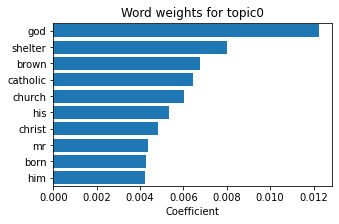

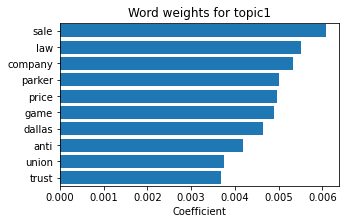

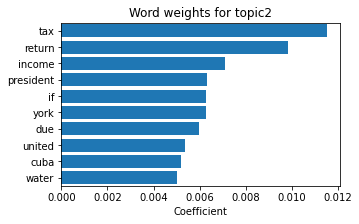

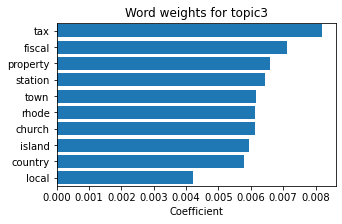

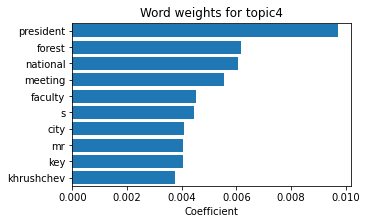

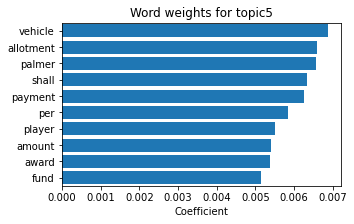

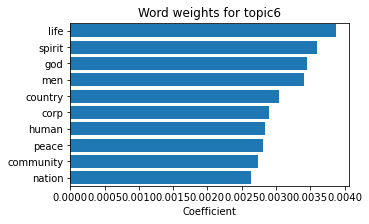

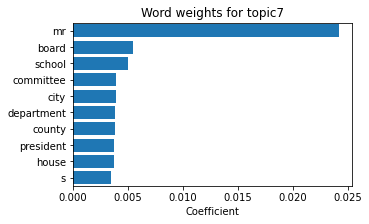

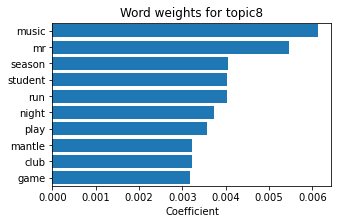

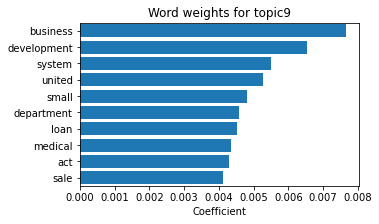

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
num = 10

for x in range(0, lda.num_topics):
    plt.figure(figsize = (5, 3))
    words = [word for word, value in lda.show_topic(x, num)]
    values = [value for word, value in lda.show_topic (x, num)]
    plt.barh(range(0, num), values)
    
    plt.title('Word weights for topic'+ str(x))
    plt.xlabel('Coefficient')
    plt.yticks(range(0, num), words)
    plt.ylim(num - 0.5, -0.5)
    plt.show()


---
### Task 8
Write conclusions in the below cell about each of the 10 topics - what do you think the topic might be about and try to think of a name you might give to the topic.

*For Latvian students: because this analysis involves analyzing words and texts in Latvian, you may also write your conclusions in Latvian.*

__*Warning: When you start writing or have already written your conclusions do not re-execute cells in Task 6 anymore because re-execution will change the topics and render your conclusions invalid. Also do not clear any cells so that you submit this file with all outputs and diagrams visible. Otherwise it will not be possible to evaluate your conclusions.*__

In [ ]:
Topic 0 #Format: Topic might be. Name might be.
... The topic about religion. the concept of church as a shelter between catholic and christ.

Topic 1
... the topic about news. The law in Dallas to anti sale of game with some trust issue.

Topic 2
... the topic about government. President makes income tax return to cuba's immigration who saling water.

Topic 3
... the topic about government and religion: things abnout tax of fiscal and propeties in rhode island's local station and church.

Topic 4
... the topic about government and review. A review of a national meeting about sustainable development related to forest and city hold by president khrushchev.

Topic 5
... topic about religion or news. award allotment between a palmer and a player with prize like vehicle and something else.

Topic 6
... Topic about religion. God makes men's life and spirit live in peace for life.

Topic 7
... Topic about government. The new city planning of one city.

Topic 8
... Topic about news and reviews. Student in night club has been caughted. 

Topic 9
... Topic about government or news. business to sale medical loan destoried the development of medical system.

---
### Task 9
For each document of the corpus, print the probabilities for it to belong to each particular topic.

In [14]:
probabilities = []
for x in range(0, len(brownsmall.fileids())):
    topics = lda.get_document_topics(corpus_bow[x])
    probabilities.extend([topic for topic, probability in topics])
    if x < 100:
        print('Topics for "' + brownsmall.fileids()[x] + '":', topics)

Topics for "ca01.txt": [(7, 0.99904084)]
Topics for "ca02.txt": [(2, 0.04281557), (6, 0.1865957), (7, 0.7159343), (9, 0.05404637)]
Topics for "ca03.txt": [(5, 0.99903476)]
Topics for "ca04.txt": [(0, 0.99901026)]
Topics for "ca05.txt": [(0, 0.026875721), (3, 0.0898748), (7, 0.8145521), (9, 0.068002954)]
Topics for "ca06.txt": [(7, 0.9989575)]
Topics for "ca07.txt": [(4, 0.049548853), (6, 0.07307154), (7, 0.8766452)]
Topics for "ca08.txt": [(3, 0.53681815), (7, 0.46225506)]
Topics for "ca09.txt": [(4, 0.8735213), (7, 0.12561232)]
Topics for "ca10.txt": [(0, 0.10963921), (1, 0.22436355), (3, 0.05892476), (7, 0.60641605)]
Topics for "ca11.txt": [(5, 0.44379634), (8, 0.5553782)]
Topics for "ca12.txt": [(1, 0.86804974), (8, 0.13097413)]
Topics for "ca13.txt": [(8, 0.99892265)]
Topics for "ca14.txt": [(5, 0.19209453), (6, 0.1948477), (7, 0.123510934), (8, 0.48889443)]
Topics for "ca15.txt": [(8, 0.9988922)]
Topics for "ca16.txt": [(7, 0.20828769), (8, 0.7908677)]
Topics for "ca17.txt": [(1, 

Find one file in the corpus where you do not agree with its detected most probable topics and in the cell below write the filename and your reasons for the disagreement.

Commets:
I don't agree with the dectection about "cd07.txt". In the result, it shows that it topic is mostly related to religion. However, when I look at the text file of "cd07". The religion stuff just shows alittle. The file is talking about how a "Fear Party" is recommend from a perspective of Dr. George W. Crane-a medical columnist to help people reduce the risk of getting psychological illness. The Topc 9 just has 1.3%, and topic related to religion has more percentage. This is very I don't disagree with the probable topic detected by LDA.

---
### A short additional task
Please write your thoughts about:
1. Any comments about this Quest?
2. What kind of task would you suggest to add for the next year students?

Commets:
1. I think the most difficult part to me is to think about conclusion toward this 10 topics, because, when I want to relate each word and think about the possible topic, It's really hard. I think probably we just need to keep 5 words. From the first topic conclusion till the end, I think the name that I gaved became more understandable. 

2. I think this Quest was good, right now I don't have suggestion for the next year students. 

---

---
Notebook by Gints Jēkabsons, Riga Technical University.